<a href="https://colab.research.google.com/github/chaithrad450/EDA/blob/main/EDA_HOTEL_BOOKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis of Hotel booking demand**

Do you ever think about when is the best time to book a hotel room? Or how long should you stay to get the best daily rate? What if you want to predict if a hotel is likely to get a lot of special requests?

The goal of this project is to create useful estimators from our data set and to conduct Exploratory Data Analysis.

This data set contains a single file that compares various booking information between two hotels: a city hotel and a resort hotel.

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the data from the dataset
file_path='/content/drive/MyDrive/hotel_bookings.csv'
df_hotel=pd.read_csv(file_path)


In [ ]:
df_hotel.shape

(119390, 32)

The total number of rows in the dataset is 119390 and the total number of columns are 32

In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#perform head()
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Perform tail()
df_hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Now we will understand more about the data set by considering each column

In [ ]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In the above step we listed 32 column headers

**hotel**:	Hotel Type
**is_canceled**:	Value indicating if the booking was canceled
**lead_time**:	Number of days between the time a guest books their room          and               the time they are scheduled to arrive at the hotel

**arrival_date_year**:	Year of arrival date

**arrival_date_month**:	Month of arrival date with 12 categories	“January” to “December”
**arrival_date_week_number**:	Week number of the arrival date
**arrival_date_day_of_month**:	Day of the month of the arrival date

**stays_in_weekend_nights**:	Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
**stays_in_week_nights**:	Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults**:	Number of adults

**children**:	Number of children

**Babies**:	Number of babies

**meal**:	Type of meal booked. Categories are presented in standard hospitality meal packages

Undefined/SC -> no meal package

BB -> Bed & Breakfast

HB -> Half board (breakfast and one other meal – usually dinner)

FB -> Full board (breakfast, lunch and dinner)

**country**:	Country of origin.

**market_segment**:	Market segment designation

**distribution_channel**:	Booking distribution channel
**is_repeated_guest**:	Value indicating if the booking name was from a repeated guest

**previous_cancellations**:	Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled**:	Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type**:	Code of room type reserved

**assigned_room_type**:	Code for the type of room assigned to the booking

**booking_changes**:	Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
**deposit_type**:	Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories

No Deposit – no deposit was made

Non Refund – a deposit was made in the value of the total stay

Refundable – a deposit was made with a value under the total cost of stay

**agent**:	ID of the travel agency that made the booking

**company**:	ID of the company/entity that made the booking or responsible for paying the booking

**days_in_waiting_list**:	Number of days the booking was in the waiting list before it was confirmed to the customer
**customer_type**:	Type of booking, assuming one of four categories	(Contract,Group,Transient,Transient-party)

Contract - when the booking has an allotment or other type of contract associated to it
Group – when the booking is associated to a group

Transient – when the booking is not part of a group or contract, and is not associated to other transient booking

Transient-party – when the booking is transient, but is associated to at least other transient booking

**adr**:	Average Daily Rate

**required_car_parking_spaces**:	Number of car parking spaces required by the customer

**total_of_special_requests**:	Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status**:	Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer

Check-Out – customer has checked in but already departed

No-Show – customer did not check-in and did inform the hotel of the reason why

**reservation_status_date**:	Date at which the last status was set







Now we will perform data cleaning

We will make a copy of the original data set and perform operation on the copy

In [ ]:
#Copying the dataset
df_copy=df_hotel.copy()

First we will check for duplicate rows in the data set

In [ ]:
df_copy[df_copy.duplicated()].shape

(31994, 32)

Total number of duplicate rows in the data set is 31994.To perform EDA it must be removed.

In [ ]:
df_copy.drop_duplicates(inplace=True)

In [ ]:
df_copy[df_copy.duplicated()].shape

(0, 32)

Checking for missing values

In [ ]:
df_copy.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [ ]:
filter = (df_copy.children == 0) & (df_copy.adults == 0) & (df_copy.babies == 0).shape
df_copy[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


Adults, babies, and children can’t be zero at the same time.Here 166 rows have adilts,babies and children have value zero.so we will drop the rows having all these zero at the same time because will mean that the hotel room was not even booked.



In [ ]:
# Drop Rows where there is no adult, baby and child
df_copy = df_copy.drop(df_copy[(df_copy.adults+df_copy.babies+df_copy.children)==0].index)

In [ ]:
filter = (df_copy.children == 0) & (df_copy.adults == 0) & (df_copy.babies == 0).shape
df_copy[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel throught any agent or via any company. So in that case values can be null under these columns.  We will replace null values by 0 in these columns

In [ ]:
# If no id of agent or company is null, just replace it with 0
df_copy[['agent','company']] = df_copy[['agent','company']].fillna(0.0)

we will replace country with mode value

In [ ]:
df_copy['country'].fillna(df_copy.country.mode().to_string(), inplace=True)

In [ ]:
## for missing children value, replace it with rounded mean value
df_copy['children'].fillna(round(df_copy.children.mean()), inplace=True)
# changing datatype of column 'reservation_status_date' to data_type.
df_copy['reservation_status_date'] = pd.to_datetime(df_copy['reservation_status_date'], format = '%Y-%m-%d')
## convert datatype of these columns from float to integer
df_copy[['children', 'company', 'agent']] = df_copy[['children', 'company', 'agent']].astype('int64')

In [ ]:
df_copy.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

All the null values are removed.

**Exploratory Data Analysis(EDA)**

Let's try to extract the informattion from our data and solve the following questions

**1. What will the overview of arrival period?**

<Axes: xlabel='arrival_date_year', ylabel='count'>

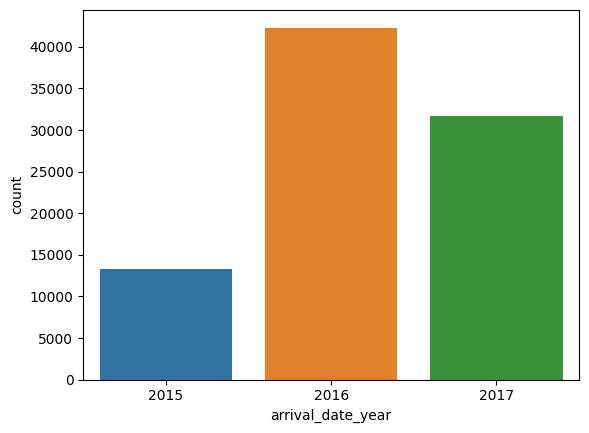

In [25]:
arrival_data = [ 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = df_copy[arrival_data]
sns.countplot(data = period_arrival, x = 'arrival_date_year')

The arrival of peoples in 2016 is double compared to 2015 but has gradually decreased in 2017

Now let's show the graphical representation of arrival of peoples according to month and per day

Text(0, 0.5, 'Count')

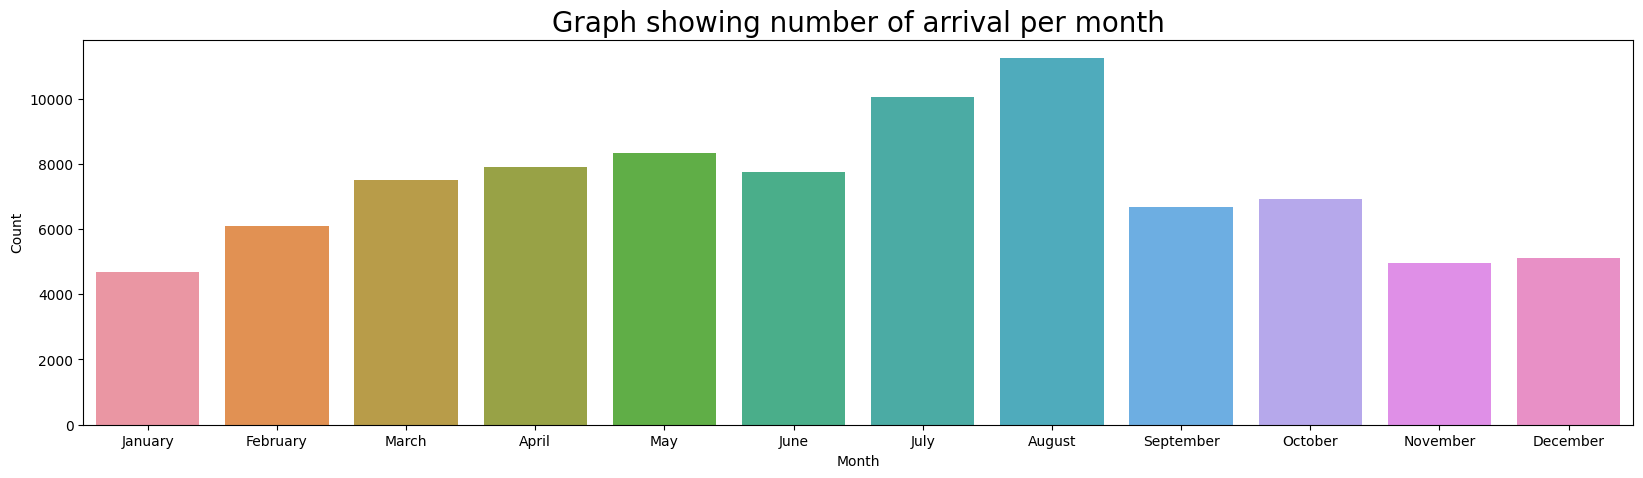

In [26]:
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

Here we can see that the Augest month has the maximum no.of peoples arrived and January has the least peples arrived

Text(0.5, 1.0, 'Graph showing number of arrival per day')

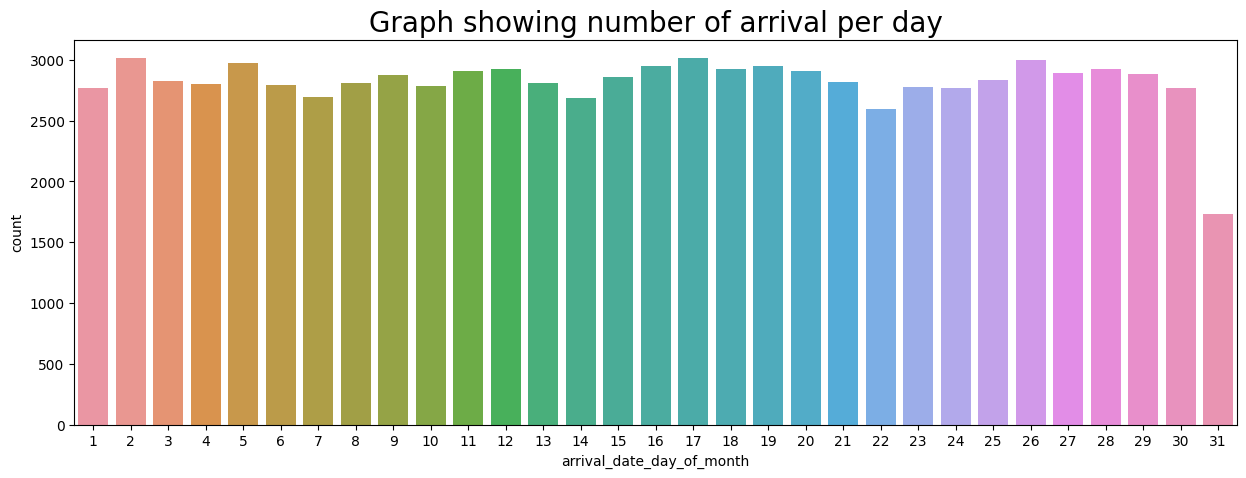

In [27]:
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', ).set_title('Graph showing number of arrival per day', fontsize = 20)

As shown in the graph the second day is having maximum arrival and 31st as the least

**2.How many guests are there who have repeatedly canceled the bookings?**

In [28]:
df_copy['is_repeated_guest'] = df_copy['is_repeated_guest'].replace(0,'No')
df_copy['is_repeated_guest'] = df_copy['is_repeated_guest'].replace(1,'Yes')

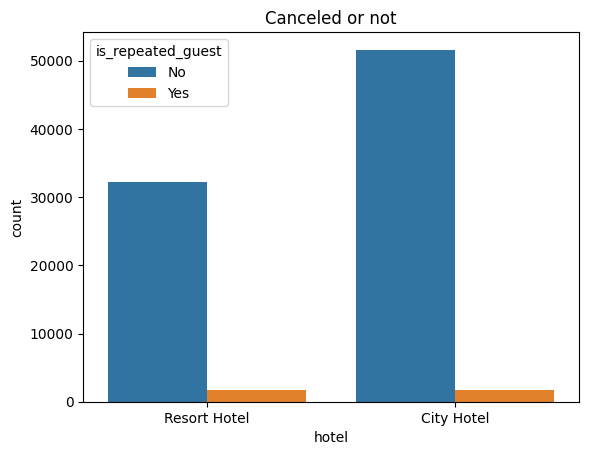

In [29]:
plt.title("Canceled or not")
canceled = sns.countplot(x = df_copy.hotel, hue = 'is_repeated_guest', data = df_copy)

**3:Which was the most booked accommodation type (Single, Couple, Family/Friends?**
We will divide people staying in the hotel into 3 categories.

Single: 1 Adult only.

Couple: 2 Adults we can’t say for sure that these two people are an actual couple or not, data does not tell us anything about this, but we will assume they are couple.

Family or Friends: More than 2 people including adults, children, and babies. (or alternatively, we can call it a group).

Text(0.5, 0, 'Acommodation %')

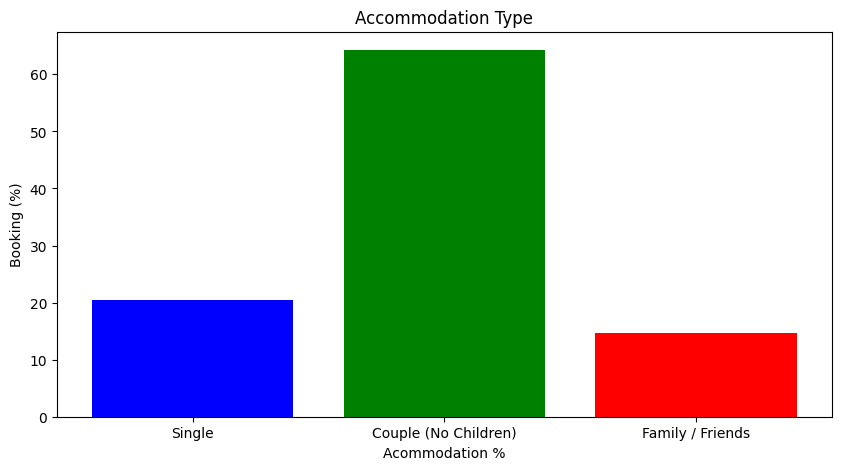

In [30]:
df_not_canceled = df_copy[df_copy['is_canceled'] == 0]
## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
n_adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]
c=['blue','green','red']

## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]

## Bar Ploting the Acommodation Type
plt.rcParams['figure.figsize'] = (10, 5)
plt.bar(names,count_percent,color=c)
plt.title('Accommodation Type')
plt.ylabel('Booking (%)')
plt.xlabel('Acommodation %')

Couple is the most popular accommodation type.So the hotels would take that into consideration and arrange accordingly.

**Which channel is mostly used for early booking of hotels and also find the average waiting time?**
At its highest level, a hotel distribution channel is anywhere — online or offline — that properties can sell rooms to potential customers. Examples of hotel distribution channels include hotel websites, online travel agencies (OTAs), global distribution systems (GDS), metasearch sites, direct phone bookings, and more.

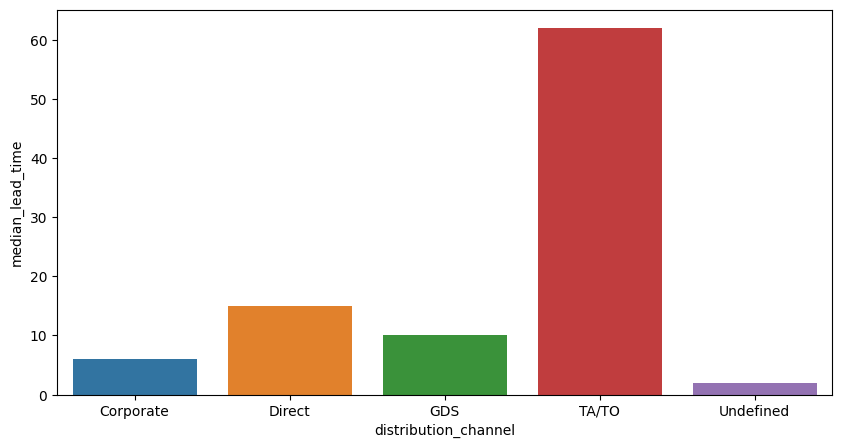

In [31]:
group_by_dc = df_copy.groupby('distribution_channel')
d0 = pd.DataFrame(round(group_by_dc['lead_time'].median(),3)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
sns.barplot(x = d0['distribution_channel'], y = d0['median_lead_time'])
plt.show()

TA/TO is mostly used for planning Hotel visits ahead of time.

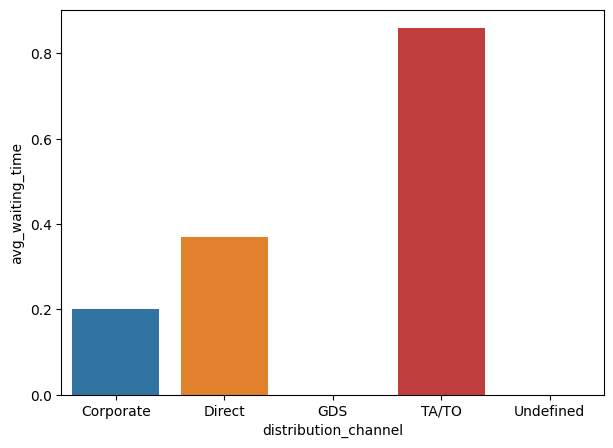

In [32]:
d1 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d1['distribution_channel'], y = d1['avg_waiting_time'])
plt.show()

While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.

**Which is the busiest month for hotels?**

Text(0.5, 0, 'Month')

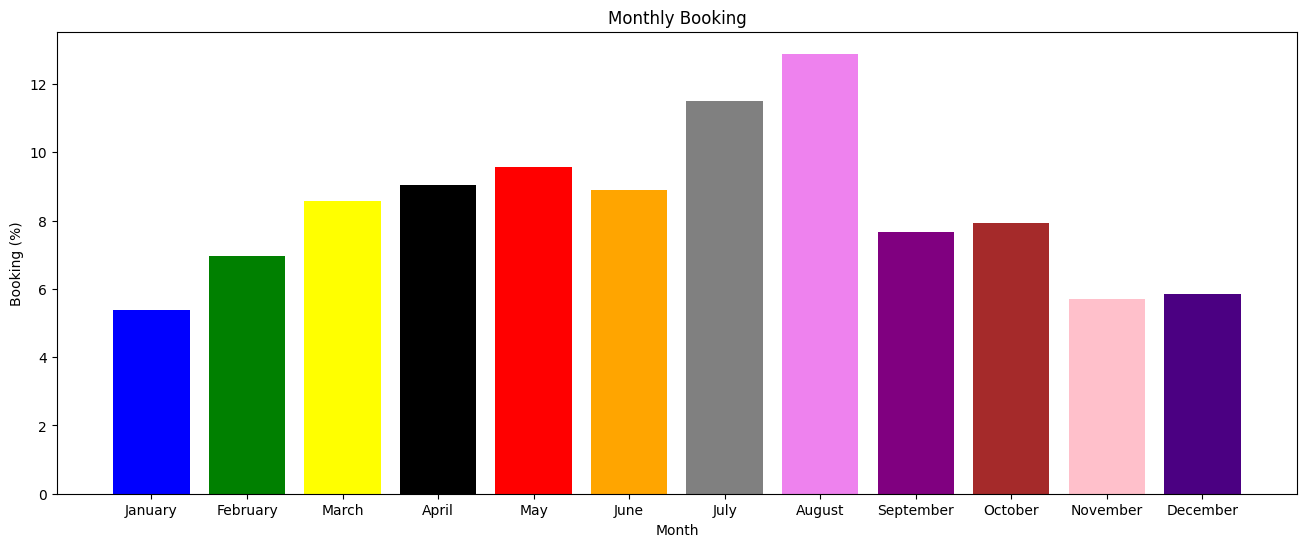

In [33]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']
c=['blue','green','yellow','black','red','orange','grey','violet','purple','brown','pink','indigo']
sorted_months = df_copy['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100
#Bar Ploting the Monthly Booking
plt.rcParams['figure.figsize'] = (16, 6)
plt.bar(x, y.values,color=c)
plt.title('Monthly Booking')
plt.ylabel('Booking (%)')
plt.xlabel('Month')


Note: As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year.

**Lets Check monthly cancellations and customer type**

<Axes: xlabel='customer_type', ylabel='mean'>

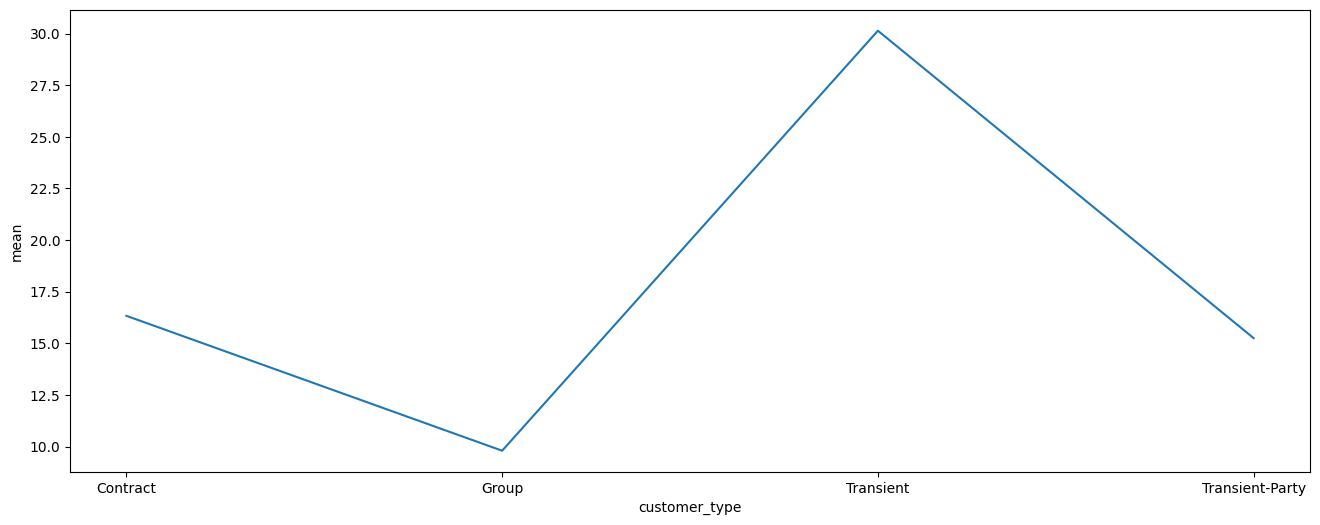

In [34]:
a = df_copy.groupby("customer_type")['is_canceled'].describe()

sns.lineplot(x=a.index, y=a["mean"] * 100)

Transient customer types have higher cancellations.

**From which country most guests come?**

<Axes: >

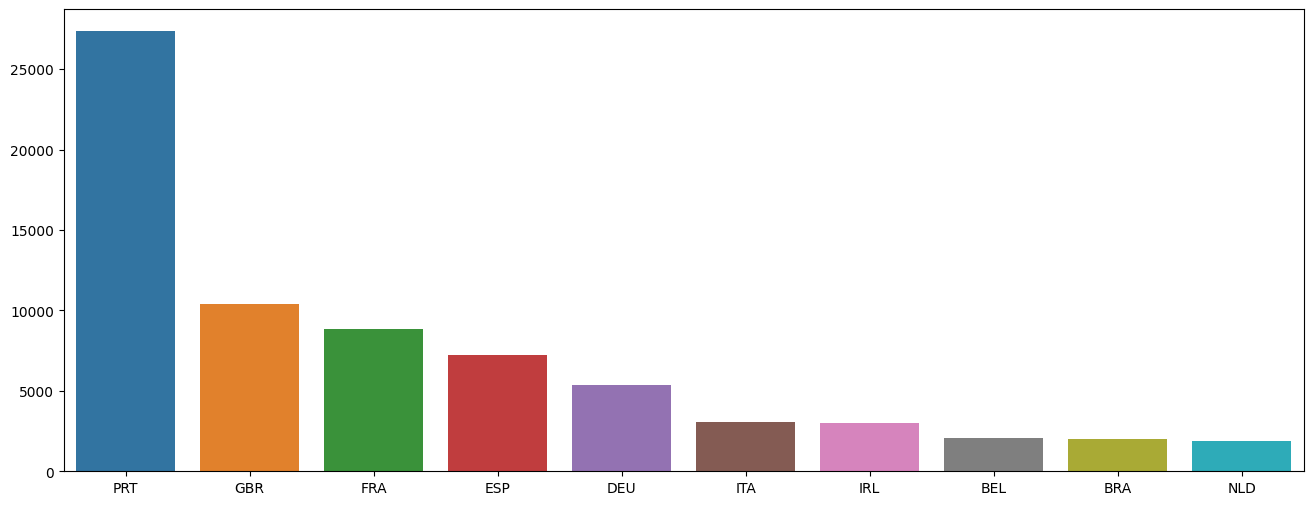

In [35]:
sns.barplot (y= list(df_copy.country.value_counts().head (10)), x= list(df_copy.country.value_counts().head(10).index))

Portugal, United kingdom ,France, Spain and Germany are the top countries from most guests come,from which portugal has the highest number of peoples.More than 80% come from Portugal, United kingdom ,France, Spain and Germany.

**What is the percentage of the repeated customers?**

In [36]:
#Showing the  percentage of repeated customers
repeated_cust = df_copy.groupby('is_repeated_guest')
df1 = pd.DataFrame(round((repeated_cust.size()/df_copy.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
labels = 'new guests','repeated guest'
df1

,is_repeated_guest,Booking_%
0,No,96.14
1,Yes,3.86


3.86 is the the booking percentage of repeated guests and the percentage of new guests is 96.14

Text(0.5, 1.0, 'Percentage of reapeated guests')

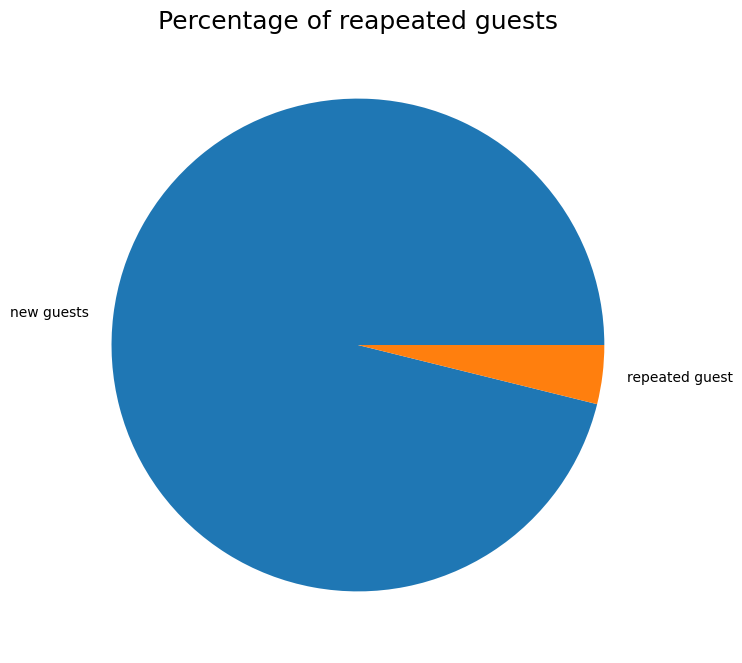

In [37]:
#Showing the pie plot
plt.figure(figsize=(8,8))
plt.pie(df1['Booking_%'],labels=labels)
plt.title('Percentage of reapeated guests',fontsize =18)

**What is the monthly customers each hotel is receiving?**

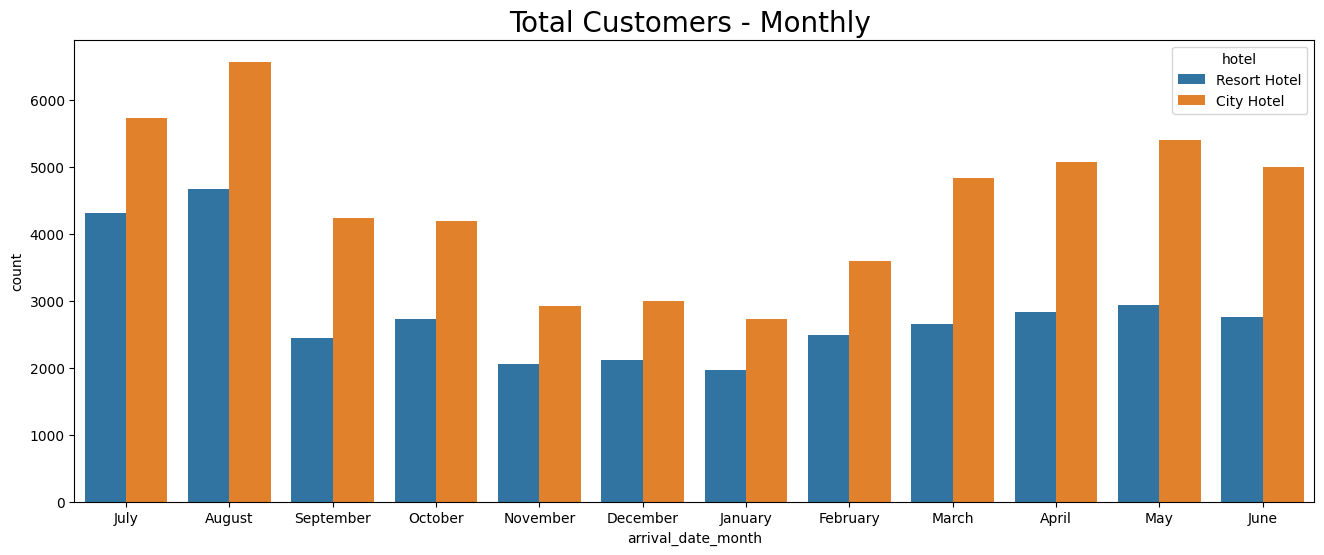

In [38]:
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = df_copy)

**We learned that**

1.The arrival of peoples in 2016 is double compared to 2015 but has gradually decreased in 2017and in the monthly arrival we can see that the Augest month has the maximum no.of peoples arrived and January has the least peples arrived.As shown in the graph the second day is having maximum arrival and 31st as the least

2.TA/TO is mostly used for planning Hotel visits ahead of time.

3.Couple is the most popular accommodation type.So the hotels would take that into consideration and arrange accordingly.

4.Most bookings were made from July to August. And the least bookings were made at the start and end of the year.

5.Transient customer types have higher cancellations.

6.Portugal, United kingdom ,France, Spain and Germany are the top countries from most guests come,from which portugal has the highest number of peoples.More than 80% come from Portugal, United kingdom ,France, Spain and Germany.

7.3.86 is the the booking percentage of repeated guests and the percentage of new guests is 96.14

